$ \Large \frac{d}{dx}(k(x)\frac{du}{dx})-q(x)u = -f(x) $

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [35]:
n = 1000
h = 1 / n

def k(x):
    return np.exp(x)

def q(x):
    return np.exp(x)

def f(x):
    return np.exp(-x)

class Solver:

    def __init__(self, n, h):
        self._n = n
        self._h = h

    def _get_matrix():
        m = np.zeros((n, n))
        d = np.zeros(n)

        m[0][0] = -1
        m[0][1] = 1
        m[n - 1][n - 2] = -k(1)
        m[n - 1][n - 1] = self._h + k(1)
        for i in range(1, n - 1):
            m[i][i - 1] = k((i - 0.5) * self._h) / self._h**2
            m[i][i] = -(k((i - 0.5) * self._h) + k((i + 0.5) * self._h)) / self._h**2 - q(i * self._h)
            m[i][i + 1] = k((i + 0.5) * self._h) / self._h**2
            d[i] = -f(i * self._h)
        return m, d
    
    def _pass_method(m, d):
        n = len(d)
        p = np.zeros(n)
        r = np.zeros(n)

        p[0] = m[0][1] / m[0][0]
        r[0] = d[0] / m[0][0]

        for i in range(1, n - 1):
            p[i] = m[i][i + 1] / (m[i][i] - m[i][i - 1] * p[i - 1])
            r[i] = (d[i] - m[i][i - 1] * r[i - 1]) / (m[i][i] - m[i][i - 1] * p[i - 1])
        r[n - 1] = (d[n - 1] - m[n - 1][n - 2] * r[n - 2]) / (m[n - 1][n - 1] - m[n - 1][n - 2] * p[n - 2])
        u = np.zeros(n)
        u[n-1] = r[n-1]

        for i in range(n - 2, -1, -1):
            u[i] = r[i] - p[i] * u[i + 1]

        x = np.array([self._h * t for t in range(n)], dtype=float)
        return u, x
    
    def solve(self):
        m, d = get_matrix()
        u, x = pass_method(m, d)
        fig, ax = plt.subplots(figsize=(20,10))
        ax.plot(x, u)
        ax.set_title("u(x)")
        plt.show()

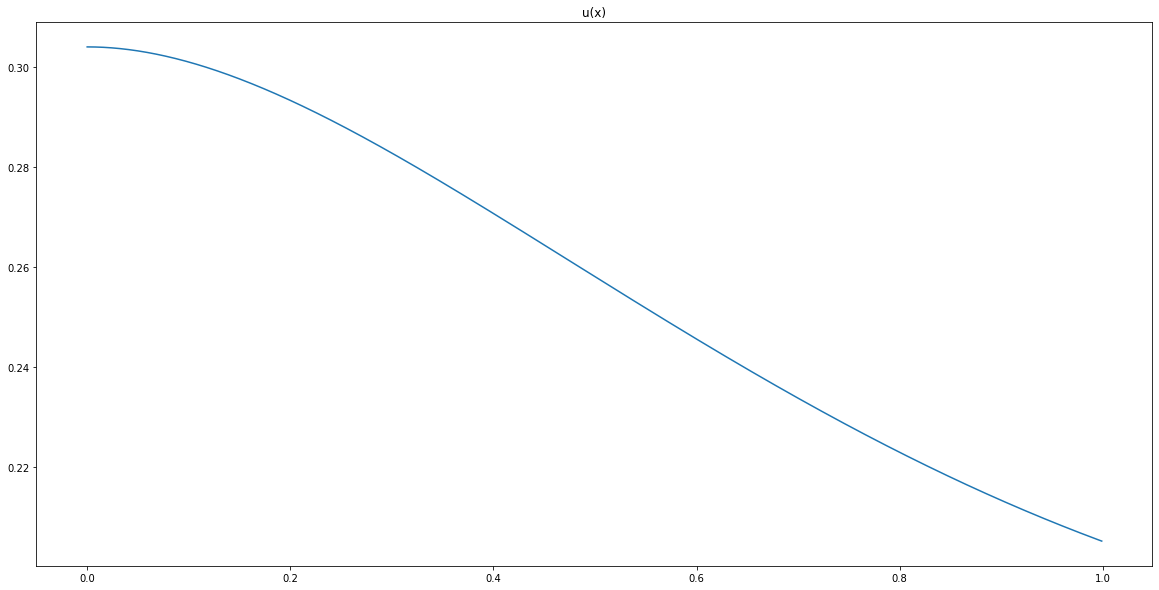

In [36]:
solver = Solver(n, h)
solver.solve()